<a href="https://colab.research.google.com/github/sahith-krishna19/EDA/blob/main/Module_3_CorrelationAnalysis_TimeSeriesAnalysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 3: Comprehensive Analysis - Univariate, Bivariate, Multivariate & Time Series Analysis

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This notebook covers a complete analysis of the dataset, including univariate, bivariate, multivariate analysis, and time series analysis. Each section is detailed with various visualizations and statistical techniques.

# Univariate Analysis

### 1. Data Cleaning and Handling Non-Numeric Values

In [1]:

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load the dataset
url = 'https://github.com/sahith-krishna19/EDA/blob/main/PhDPublications.csv?raw=true'
data = pd.read_csv(url)
data.head()


,rownames,articles,gender,married,kids,prestige,mentor
0,1,0,male,yes,0,2.52,7
1,2,0,female,no,0,2.05,6
2,3,0,female,no,0,3.75,6
3,4,0,male,yes,1,1.18,3
4,5,0,female,no,0,3.75,26


#### Finding and Listing Non-Numeric Values

In [2]:

# Find and list non-numeric values in the dataset
non_numeric_count = data.apply(lambda x: ~x.apply(lambda y: pd.api.types.is_numeric_dtype(y))).sum()
print("Number of non-numeric values in each column:")
print(non_numeric_count)

# List of non-numeric values
non_numeric_values = data.apply(lambda x: x[~x.apply(lambda y: pd.api.types.is_numeric_dtype(y))].unique())
print("Non-numeric values in each column:")
non_numeric_values


Number of non-numeric values in each column:
rownames    915
articles    915
gender      915
married     915
kids        915
prestige    915
mentor      915
dtype: int64
Non-numeric values in each column:


,0
rownames,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
articles,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16,..."
gender,"[male, female]"
married,"[yes, no]"
kids,"[0, 1, 2, 3]"
prestige,"[2.5199999809265137, 2.049999952316284, 3.75, ..."
mentor,"[7, 6, 3, 26, 2, 4, 0, 14, 13, 1, 9, 5, 8, 25,..."


### 2. Setting Missing Values and Cleaning Specific Fields

In [3]:

# Handling missing values in 'prestige' column and converting to integer
data['prestige'].fillna(data['prestige'].mean(), inplace=True)
data['prestige'] = data['prestige'].astype(int)

# Cleaning 'kids' field by replacing unrealistic values with median
median_kids = data['kids'].median()
data['kids'] = data['kids'].apply(lambda x: median_kids if x < 0 else x)

# Display updated data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  915 non-null    int64 
 1   articles  915 non-null    int64 
 2   gender    915 non-null    object
 3   married   915 non-null    object
 4   kids      915 non-null    int64 
 5   prestige  915 non-null    int64 
 6   mentor    915 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 50.2+ KB


### 3. Distribution and Visualization

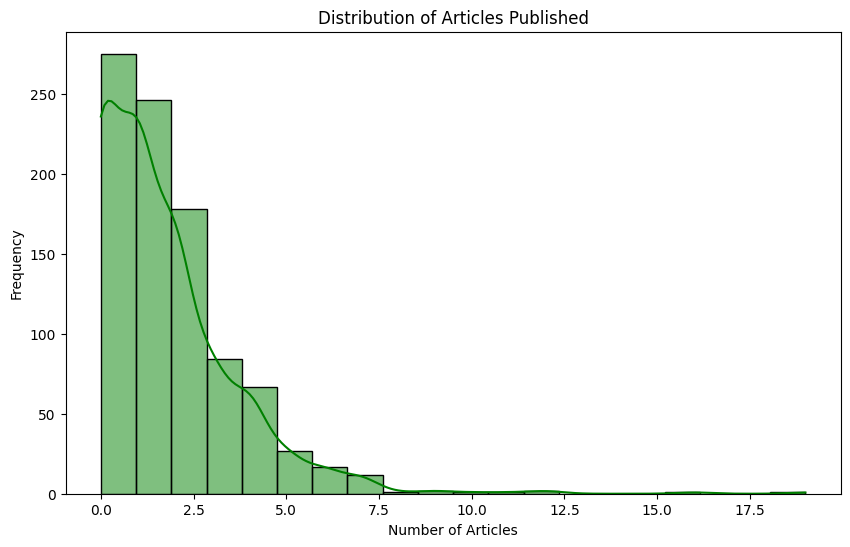

In [4]:

# Plotting the distribution of 'articles' with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data['articles'], bins=20, kde=True, color='green')
plt.title('Distribution of Articles Published')
plt.xlabel('Number of Articles')
plt.ylabel('Frequency')
plt.show()


### 4. Top 30 Largest Values and Visualization

<ipython-input-5-35e12da54b65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_30_articles['rownames'], y=top_30_articles['articles'], palette='viridis')


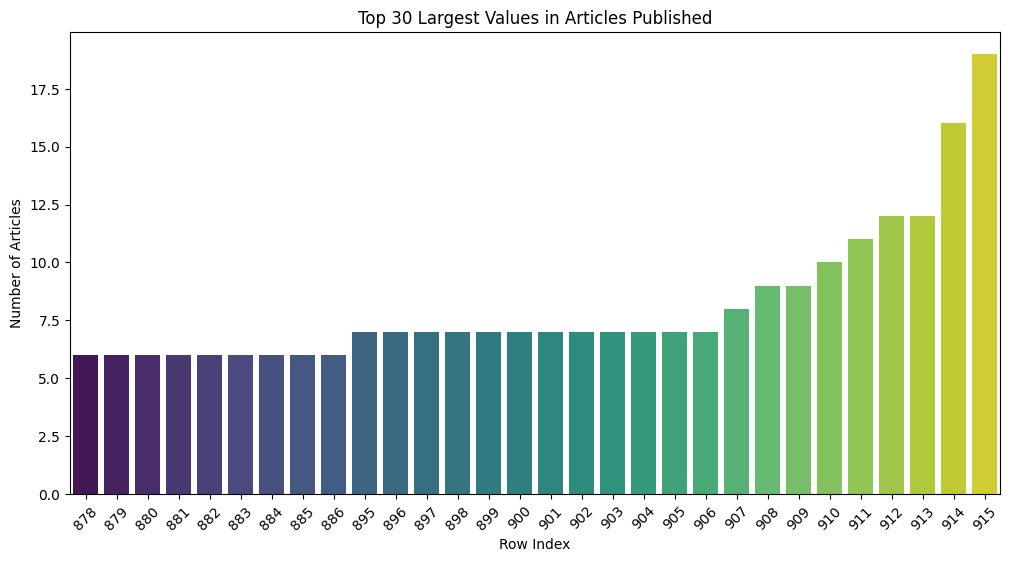

In [5]:

# Displaying and plotting top 30 largest values in 'articles'
top_30_articles = data.nlargest(30, 'articles')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_30_articles['rownames'], y=top_30_articles['articles'], palette='viridis')
plt.title('Top 30 Largest Values in Articles Published')
plt.xlabel('Row Index')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


### 5. Box Plots and FacetGrid Visualizations

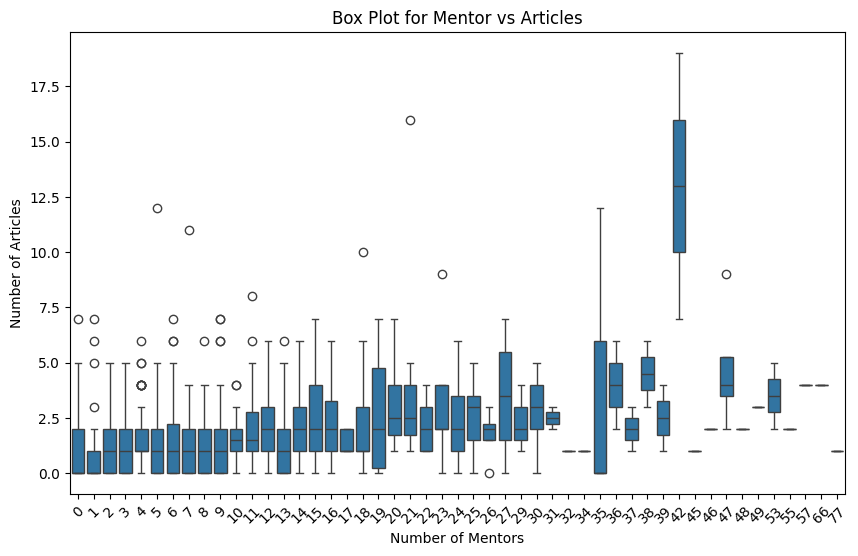

In [6]:

# Box plot for 'mentor' vs 'articles'
plt.figure(figsize=(10, 6))
sns.boxplot(x='mentor', y='articles', data=data)
plt.title('Box Plot for Mentor vs Articles')
plt.xlabel('Number of Mentors')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


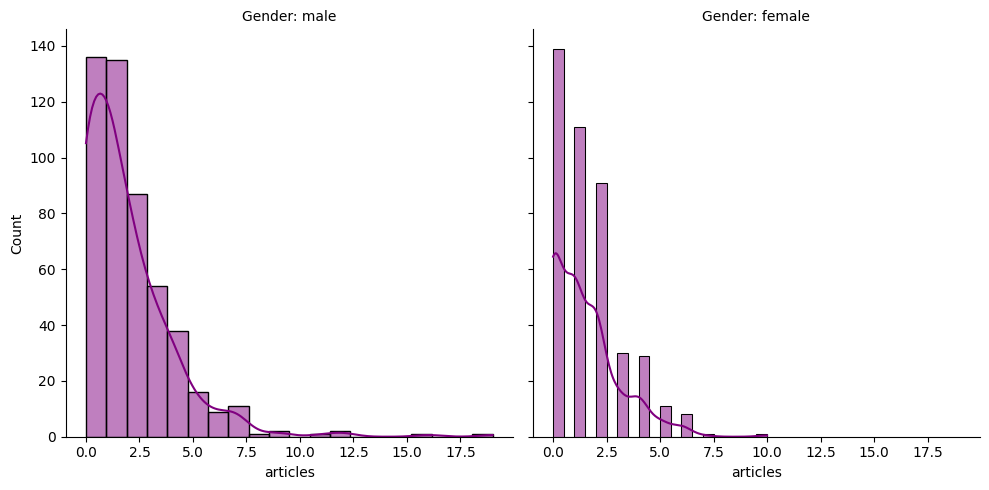

In [7]:

# FacetGrid for 'articles' and 'gender'
g = sns.FacetGrid(data, col='gender', height=5, aspect=1)
g.map(sns.histplot, 'articles', bins=20, kde=True, color='purple')
g.set_titles('Gender: {col_name}')
plt.show()


# Module 3: Comprehensive Analysis - Bivariate Analysis

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This notebook section covers the detailed Bivariate Analysis of the dataset.

### 1. Scatter Plots and Correlation Analysis

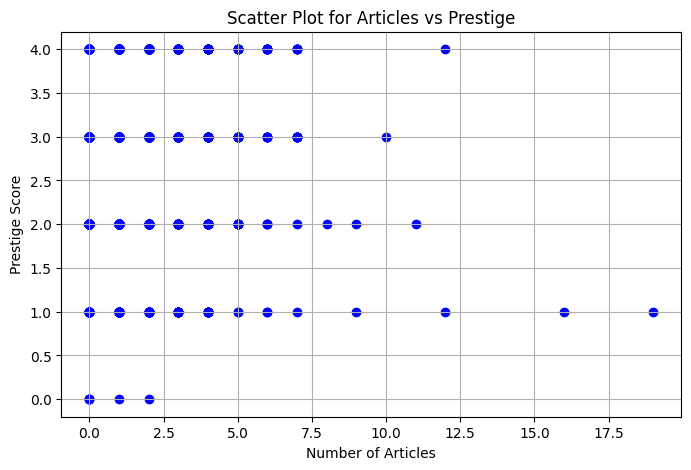

Correlation between 'articles' and 'prestige': 0.04
p-value: 2.11e-01


In [8]:

# Scatter plot for 'articles' vs 'prestige'
plt.figure(figsize=(8, 5))
plt.scatter(data['articles'], data['prestige'], color='blue')
plt.title('Scatter Plot for Articles vs Prestige')
plt.xlabel('Number of Articles')
plt.ylabel('Prestige Score')
plt.grid(True)
plt.show()

# Calculating correlation coefficient
corr_articles_prestige = stats.pearsonr(data['articles'], data['prestige'])
print(f"Correlation between 'articles' and 'prestige': {corr_articles_prestige[0]:.2f}")
print(f"p-value: {corr_articles_prestige[1]:.2e}")


### 2. Box Plots for Categorical and Numerical Variables

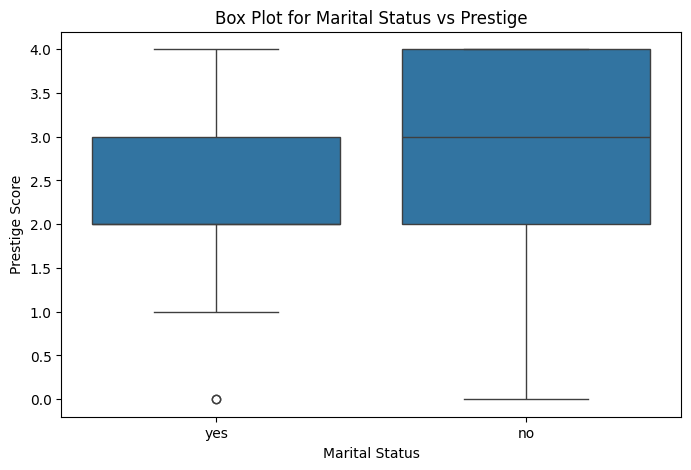

In [9]:

# Box plot for 'married' vs 'prestige'
plt.figure(figsize=(8, 5))
sns.boxplot(x='married', y='prestige', data=data)
plt.title('Box Plot for Marital Status vs Prestige')
plt.xlabel('Marital Status')
plt.ylabel('Prestige Score')
plt.show()


### 3. Heatmap for Correlation Analysis

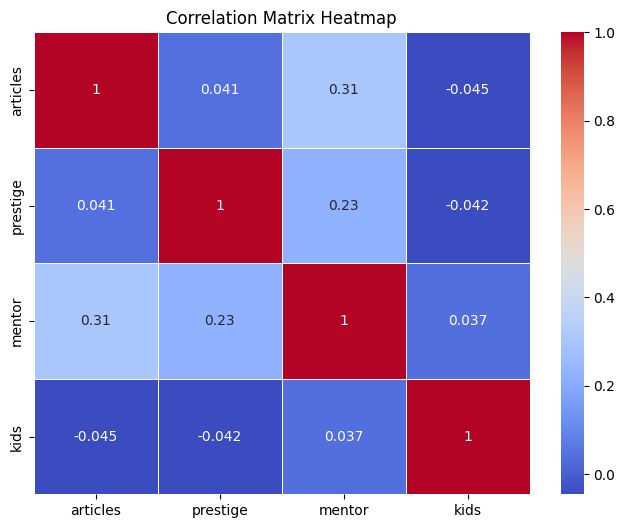

In [10]:

# Calculating and visualizing the correlation matrix heatmap
correlation_matrix = data[['articles', 'prestige', 'mentor', 'kids']].corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Module 3: Comprehensive Analysis - Multivariate Analysis

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This notebook section covers the detailed Multivariate Analysis of the dataset.

### 1. Pair Plot Analysis

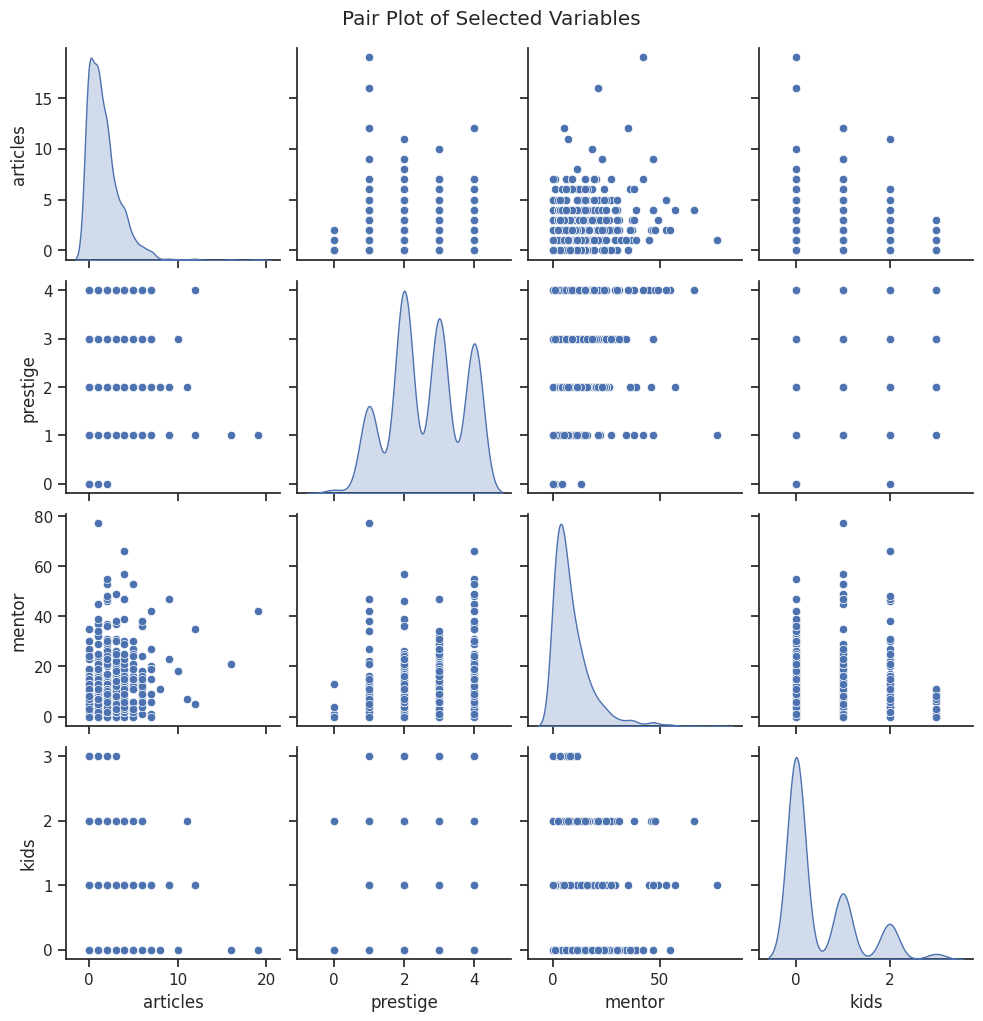

In [11]:

# Pair plot for selected variables with hue
sns.set(style='ticks', color_codes=True)
sns.pairplot(data[['articles', 'prestige', 'mentor', 'kids']], diag_kind='kde')
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.show()


### 2. Pair Plot with Regression Lines

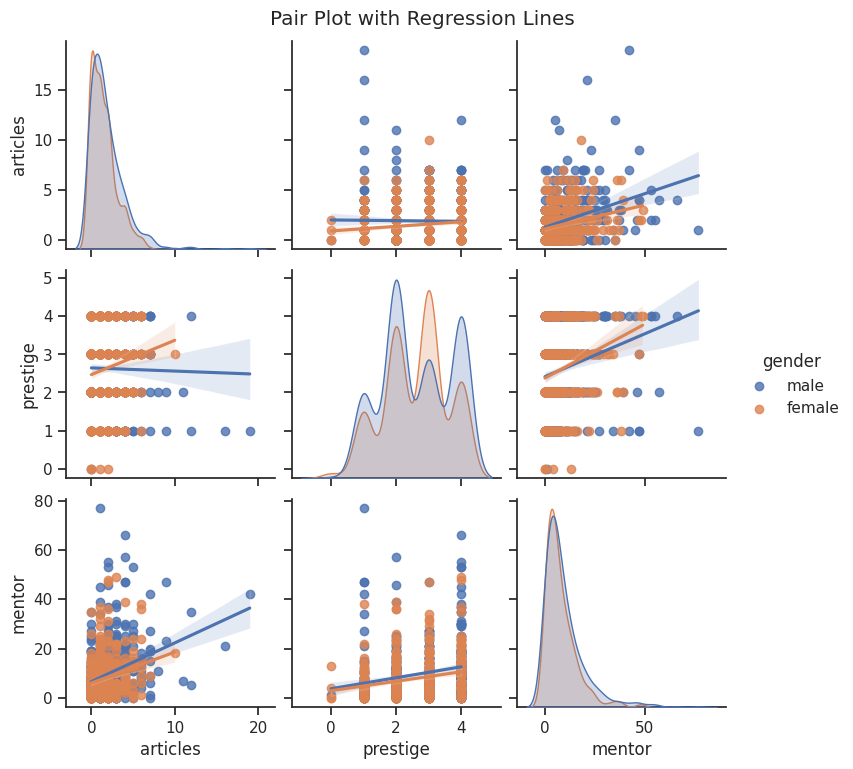

In [12]:

# Pair plot with regression lines
sns.pairplot(data, vars=['articles', 'prestige', 'mentor'], kind='reg', hue='gender')
plt.suptitle('Pair Plot with Regression Lines', y=1.02)
plt.show()


### 3. Complete Correlation Analysis

In [13]:

# Calculating correlation for all numerical columns using Pearson method
correlation_all = data.corr(method='pearson', numeric_only=True)
correlation_all


,rownames,articles,kids,prestige,mentor
rownames,1.000000,0.840483,-0.050011,0.088579,0.277449
articles,0.840483,1.000000,-0.045214,0.041382,0.305862
kids,-0.050011,-0.045214,1.000000,-0.042446,0.037020
prestige,0.088579,0.041382,-0.042446,1.000000,0.226428
mentor,0.277449,0.305862,0.037020,0.226428,1.000000


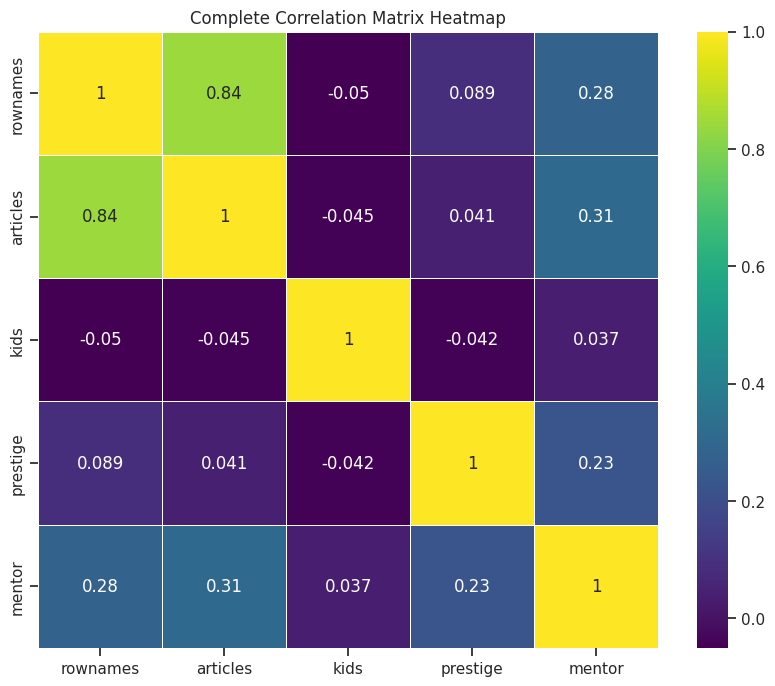

In [14]:

# Plotting heatmap for complete correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_all, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Complete Correlation Matrix Heatmap')
plt.show()


# Module 3: Time Series Analysis (Synthetic Time Index)

## Student Details
**Name**: Sahith Krishna
**Registration Number**: 21BDS0078

## Overview
This section covers Time Series Analysis (TSA) using a synthetic time index.

### 1. Creating a Synthetic Time Index

In [15]:

# Creating a synthetic time index
data['time_index'] = pd.date_range(start='2020-01-01', periods=len(data), freq='D')
data.set_index('time_index', inplace=True)

# Displaying the dataset with synthetic time index
data.head()


,rownames,articles,gender,married,kids,prestige,mentor
time_index,,,,,,,
2020-01-01,1,0,male,yes,0,2,7
2020-01-02,2,0,female,no,0,2,6
2020-01-03,3,0,female,no,0,3,6
2020-01-04,4,0,male,yes,1,1,3
2020-01-05,5,0,female,no,0,3,26


### 2. Basic Time Series Plot

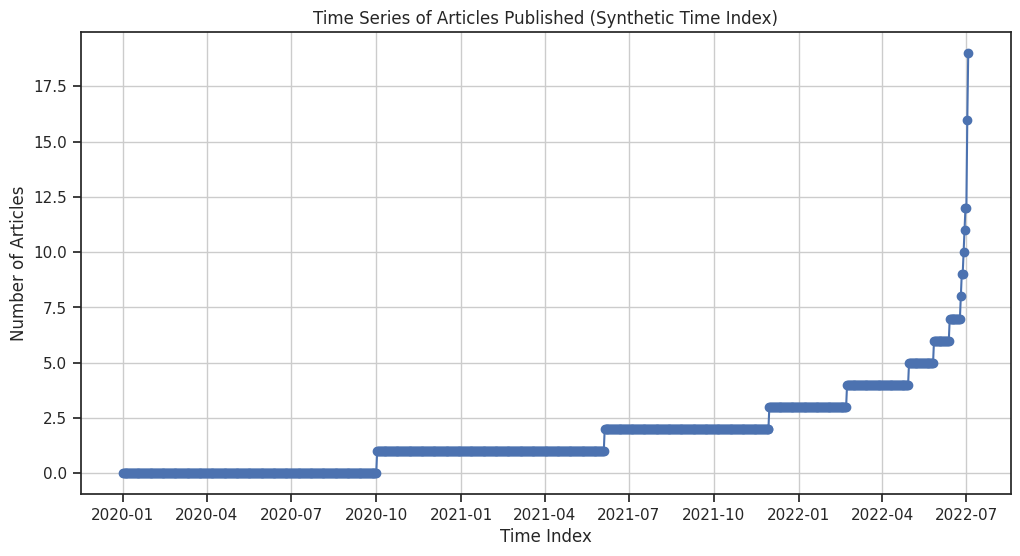

In [16]:

# Basic time series plot of 'articles' over synthetic time index
plt.figure(figsize=(12, 6))
plt.plot(data['articles'], marker='o', linestyle='-', color='b')
plt.title('Time Series of Articles Published (Synthetic Time Index)')
plt.xlabel('Time Index')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


### 3. Resampling and Rolling Mean Analysis

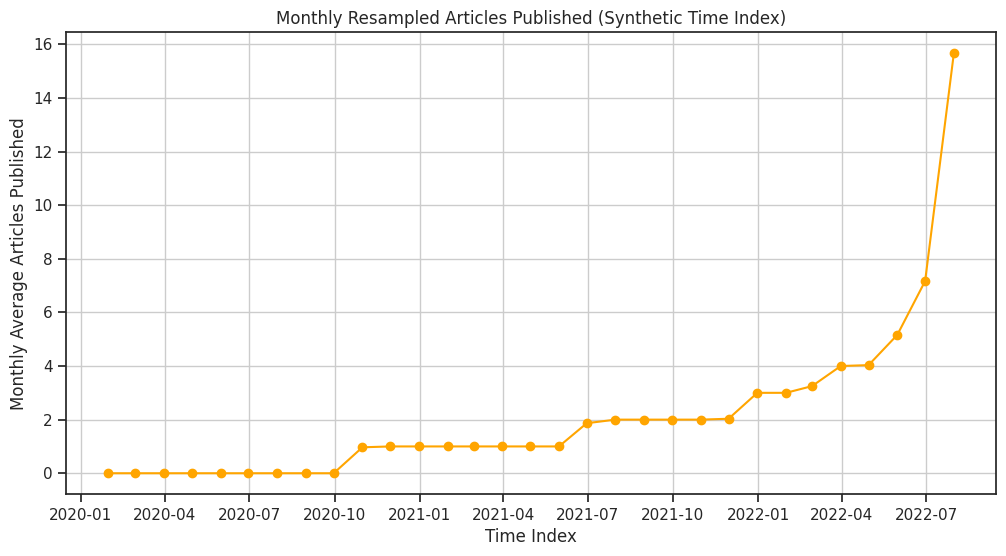

In [17]:

# Resampling the data to monthly frequency and calculating mean
monthly_articles = data['articles'].resample('M').mean()

# Plotting the monthly resampled data
plt.figure(figsize=(12, 6))
plt.plot(monthly_articles, marker='o', color='orange')
plt.title('Monthly Resampled Articles Published (Synthetic Time Index)')
plt.xlabel('Time Index')
plt.ylabel('Monthly Average Articles Published')
plt.grid(True)
plt.show()


### 4. Rolling Statistics for Trend Analysis

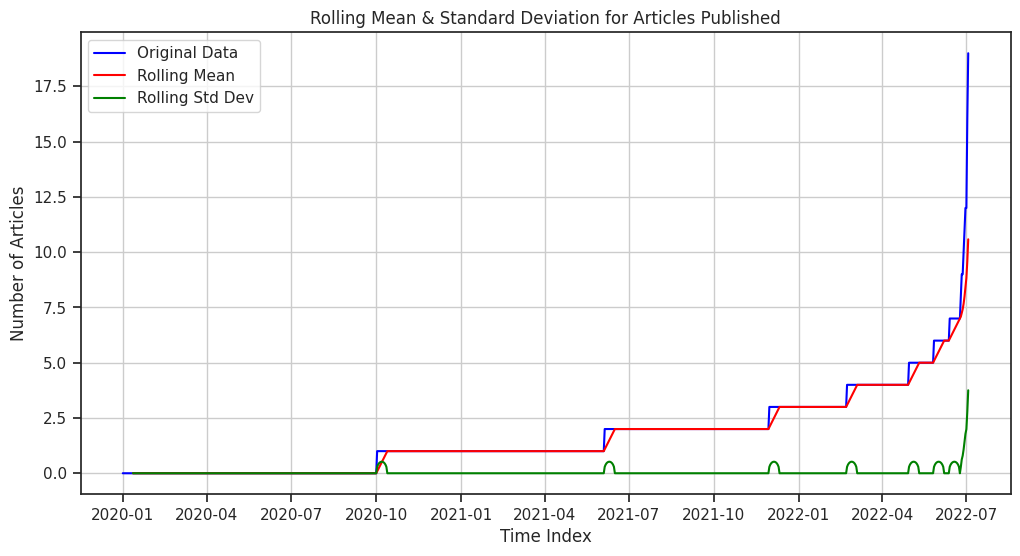

In [18]:

# Calculating rolling mean and standard deviation
rolling_mean = data['articles'].rolling(window=12).mean()
rolling_std = data['articles'].rolling(window=12).std()

# Plotting rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(data['articles'], label='Original Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='green')
plt.title('Rolling Mean & Standard Deviation for Articles Published')
plt.xlabel('Time Index')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()


### 5. Seasonal Decomposition

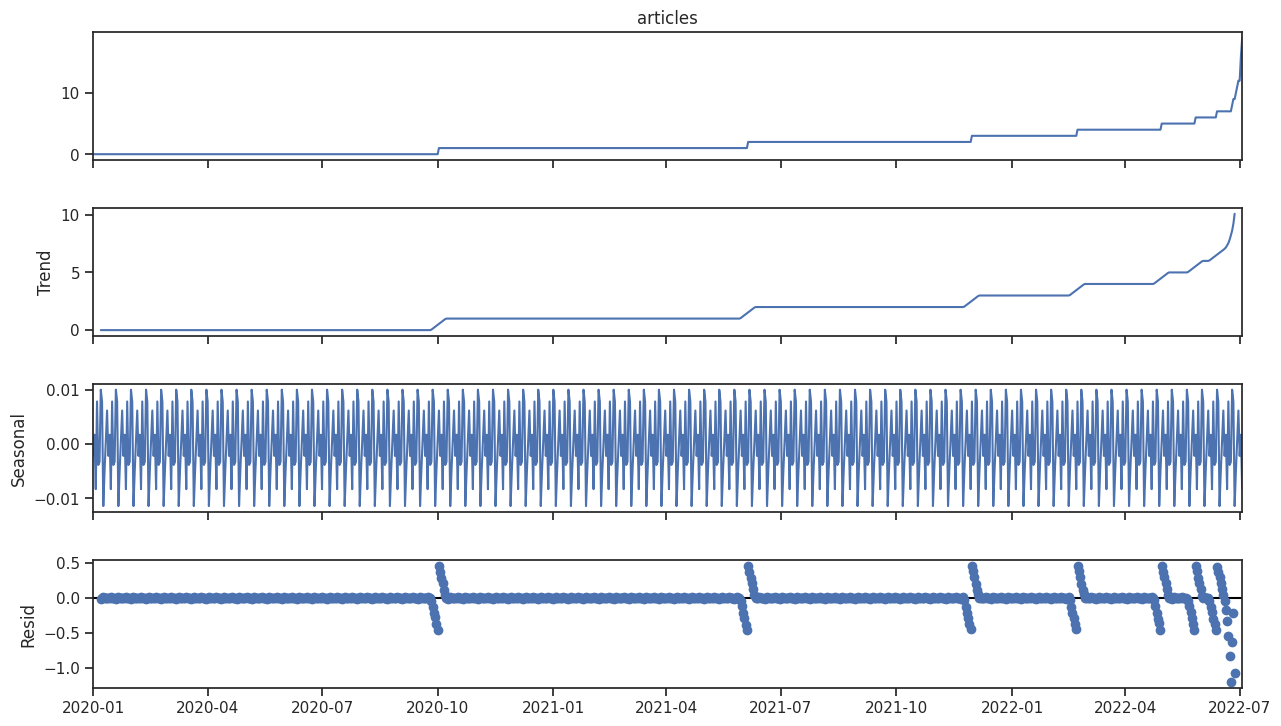

In [19]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition of time series
decomposition = seasonal_decompose(data['articles'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()


## Conclusion
This section provides a detailed Time Series Analysis using a synthetic time index for the dataset.